In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install seaborn

In [3]:
train_image='D:/Documents/Capstone/Project -2/Dataset/Full/train'

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)

In [5]:
training_set=train_datagen.flow_from_directory(train_image,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=5)


Found 1852 images belonging to 11 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=train_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/Dataset/Full/test',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=5)

Found 910 images belonging to 11 classes.


In [7]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
 
base_model.trainable=False
 
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(11, activation='softmax')
    ])

In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 5, 5, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [10]:
early = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [11]:
batch_size=32
STEP_SIZE_TRAIN = training_set.n//training_set.batch_size
STEP_SIZE_VALID = test_set.n//test_set.batch_size

# fit model
history = model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks=[early])

Epoch 1/10
370/370 [==============================] - 1489s 4s/step - loss: 1.6588 - accuracy: 0.4478 - auc: 0.8503 - precision: 0.6878 - recall: 0.2588 - true_positives: 478.0000 - val_loss: 1.6022 - val_accuracy: 0.4341 - val_auc: 0.8579 - val_precision: 0.6644 - val_recall: 0.3154 - val_true_positives: 287.0000
Epoch 2/10
370/370 [==============================] - 1480s 4s/step - loss: 1.2341 - accuracy: 0.5923 - auc: 0.9191 - precision: 0.7791 - recall: 0.4640 - true_positives: 857.0000 - val_loss: 1.4572 - val_accuracy: 0.5813 - val_auc: 0.8873 - val_precision: 0.7321 - val_recall: 0.3813 - val_true_positives: 347.0000
Epoch 3/10
370/370 [==============================] - 1506s 4s/step - loss: 1.0837 - accuracy: 0.6670 - auc: 0.9364 - precision: 0.8128 - recall: 0.5382 - true_positives: 994.0000 - val_loss: 1.1798 - val_accuracy: 0.6516 - val_auc: 0.9203 - val_precision: 0.8820 - val_recall: 0.4846 - val_true_positives: 441.0000
Epoch 4/10
370/370 [==============================] 

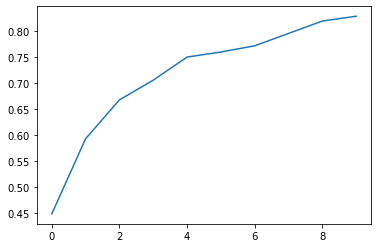

In [12]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()